#**CLASSIFICATION : TRUE/FALSE VS OTHER :**

**Membres:** Hadjoudja Bachir (21811363), Zeggar Rym (21909615), Bendahmane Rania (21811387), Labiad Youcef (21710780).

In [ ]:
#les imports utilisés dans ce notebook 
import sys
from numpy import vstack
import pandas as pd
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torch import Tensor
from torch.nn import Linear
from torch.nn import ReLU
from torch.nn import Sigmoid
from torch.nn import Module
from torch.optim import SGD
from torch.nn import BCELoss
from torch.nn.init import kaiming_uniform_
from torch.nn.init import xavier_uniform_
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from pandas import read_csv
from sklearn.feature_extraction.text import TfidfVectorizer
from  sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import pickle
import string

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer 
from nltk.corpus import stopwords
from nltk import word_tokenize
from sklearn.pipeline import Pipeline

autorisation

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


chemin spécifique Google Drive

In [ ]:
my_local_drive='/content/gdrive/My Drive/Colab Notebooks'
# Ajout du path pour les librairies, fonctions et données
sys.path.append(my_local_drive)
# Se positionner sur le répertoire associé
%cd $my_local_drive
%ls

%pwd

/content/gdrive/My Drive/Colab Notebooks
 avecscaler.pkl
 Classification_de_données_textuelles2023.ipynb
'Copie de TRUE FALSE_vs_OTHER.ipynb'
 Dataset/
 firstmodel.pkl
'Ingénierie_des_données_textuelles2023 (1).ipynb'
 Ingénierie_des_données_textuelles2023.ipynb
 MyNLPUtilities.py
 newsTrain2.csv
 newsTrain_-_newsTrain.csv
 penguins.csv
 penguins.csv.1
 pkl_modelNB.sav
 Premières_Classifications.ipynb
'Projet ML FakeNEWS_TRUE FALSE_TEXT.ipynb'
'Projet ML FakeNEWS_TRUE FALSE_TEXT+TITRE.ipynb'
'Projet ML FakeNEWS_TRUE FALSE_TEXT+TITRE_TOPIC_MODELLING.ipynb'
'Projet ML FakeNEWS_TRUE FALSE_TITRE.ipynb'
 __pycache__/
 ReviewsLabelled.csv
 ReviewsLabelled.csv.1
 ReviewsLabelled.csv.2
 ReviewsLabelled.csv.3
 ReviewsLabelled.csv.4
 ReviewsLabelled.csv.5
 SentimentModel.pkl
 StopWordsFrench.csv
 StopWordsFrench.csv.1
 StopWordsFrench.csv.2
 StopWordsFrench.csv.3
 StopWordsFrench.csv.4
 Topics_extraction.ipynb
 TP1_HAI817I.ipynb
 TP2_HAI817I.ipynb
'TRUE FALSE_vs_OTHER.ipynb'
 Visualisation

'/content/gdrive/My Drive/Colab Notebooks'

La fonction qui sera utilisée pour les prétraitements: MyCleanText 
* Mettre le texte en minuscule
* Se débarasser des stopwords
* Se débarasser des nombres
* Stemmatisation
* Lemmatisation ..

In [ ]:
#...................................................Fonction MyCleanText .............................................................................
# mettre en minuscule
#enlever les stopwords
#se debarasser des nombres
#stemmatisation
#lemmatisation 
#......................................................................................................................................................


nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
#liste des stopwords en anglais
stop_words = set(stopwords.words('english')) 

def MyCleanText(X,
                lowercase=False, #mettre en minuscule
                removestopwords=False, #supprimer les stopwords
                removedigit=False, #supprimer les nombres
                getstemmer=False, #conserver la racine des termes
                getlemmatisation=False #lemmatisation des termes
                ):
  #conversion du texte d'entrée en chaîne de caractères
    sentence=str(X)
    #suppression des caractères spéciaux
    sentence = re.sub(r'[^\w\s]',' ', sentence)
    # suppression de tous les caractères uniques
    sentence = re.sub(r'\s+[a-zA-Z]\s+', ' ', sentence)
    # substitution des espaces multiples par un seul espace
    sentence = re.sub(r'\s+', ' ', sentence, flags=re.I)

    # decoupage en mots
    tokens = word_tokenize(sentence)
    if lowercase:
          tokens = [token.lower() for token in tokens]

    # suppression ponctuation
    table = str.maketrans('', '', string.punctuation)
    words = [token.translate(table) for token in tokens]

    # suppression des tokens non alphabetique ou numerique
    words = [word for word in words if word.isalnum()]
    
    # suppression des tokens numerique
    if removedigit:
        words = [word for word in words if not word.isdigit()]

    # suppression des stopwords
    if removestopwords:
        words = [word for word in words if not word in stop_words]

    # lemmatisation
    if getlemmatisation:
        lemmatizer=WordNetLemmatizer()
        words = [lemmatizer.lemmatize(word)for word in words]
        

    # racinisation
    if getstemmer:
        ps = PorterStemmer()
        words=[ps.stem(word) for word in words]
        
    sentence= ' '.join(words)
  
    return sentence   

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


* La classe TextNormalizer qui contiendra la fonction MyCleanText.

* Fit_transform de mon corpus propre.


In [ ]:
#..................................................Etape 1 : prétraitement du texte ...................................................................................................
#...................................................Class TextNormalizer  .............................................................................
#fit_transform de mon corpus propre 
#......................................................................................................................................................

from sklearn.base import BaseEstimator, TransformerMixin

class TextNormalizer(BaseEstimator, TransformerMixin):
    def __init__(self, 
                 removestopwords=False, # suppression des stopwords
                 lowercase=False,# passage en minuscule
                 removedigit=False, # supprimer les nombres  
                 getstemmer=False,# racinisation des termes 
                 getlemmatisation=False # lemmatisation des termes  
                ):
        
        self.lowercase=lowercase
        self.getstemmer=getstemmer
        self.removestopwords=removestopwords
        self.getlemmatisation=getlemmatisation
        self.removedigit=removedigit

    def transform(self, X, **transform_params):
        # Nettoyage du texte
        X=X.copy() # pour conserver le fichier d'origine
        return [MyCleanText(text,lowercase=self.lowercase,
                            getstemmer=self.getstemmer,
                            removestopwords=self.removestopwords,
                            getlemmatisation=self.getlemmatisation,
                            removedigit=self.removedigit) for text in X]

    def fit(self, X, y=None, **fit_params):
        return self
    
    def fit_transform(self, X, y=None, **fit_params):
        return self.fit(X).transform(X)

    def get_params(self, deep=True):
        return {
            'lowercase':self.lowercase,
            'getstemmer':self.getstemmer,
            'removestopwords':self.removestopwords,
            'getlemmatisation':self.getlemmatisation,
            'removedigit':self.removedigit
        }    
    
    def set_params (self, **parameters):
        for parameter, value in parameters.items():
            setattr(self,parameter,value)
        return self    


##**Etape 1 : Préparer les données**
* Load et preparer les données à partir des 2 fichiers csv
* Sélectionner que les lignes où on a True, False ou Other
* Après en créant une nouvelle colonne "regrouped" si la valeur de la colonne rating est true ou bien false on mettra TRUE/FALSE sinon on laisse OTHER

In [ ]:
#Ici je cherche à séléctionner que les labels TRUE/FALSE et OTHER, donc les LIGNES qui contiennent au rating TRUE,FALSE et OTHER uniquement, le reste on enlève

dftrain = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/newsTrain2.csv", names=['id','text','title','rating'], header=0,sep=',', encoding='utf8')
dftrain.reset_index(drop = True, inplace = True)

dftrain2 = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/newsTrain_-_newsTrain.csv", names=['id','text','title','rating'], header=0,sep=',', encoding='utf8')
dftrain2.reset_index(drop = True, inplace = True)


# concaténer les deux dataframes en ajoutant les lignes du deuxième à la fin du premier
dftrain = pd.concat([dftrain, dftrain2], ignore_index=True)
dftrain = dftrain.loc[dftrain['rating'].isin(['TRUE','FALSE', 'other'])]

#On crée une colonne regroupe qui va mettre dans les lignes là où a true ou bien false la valeur TRUE/FALSE et OTHER ça laisse
dftrain['regrouped'] = dftrain['rating'].apply(lambda x:'TRUE/FALSE' if x in ['TRUE', 'FALSE'] else 'OTHER')

#Quelques affichages pour aider à mieux visualiser nos données
print("Echantillon de mon dataset \n")
print(dftrain.sample(n=10))
print("\n")
print("Quelques informations importantes \n")
dftrain.info()

Echantillon de mon dataset 

            id                                               text  \
2374  d8c5eecd  Teachers who leave the profession for other jo...   
986   d1741354  News| [email protected] “If you won’t lead, th...   
832   97b3e15c  Denying 2000 years of the Medieval Warm Period...   
2425  7f8bf578  President Trump has sometimes claimed that sci...   
1451  2963ac03  General Colin Powell’s Chief of Staff, Col. Wi...   
2356  e5a08193  Image copyright Getty Images  Workers on zero-...   
2064   2695016  He did none of those things. I’ve reviewed all...   
2205  9f10a8a9  It was an accurate and judicious answer, so na...   
993   88a75bcc  A 30-year old man from Kentucky underwent some...   
1799  d2a52dd6                          AMA Lied – How Many Died?   

                                                  title rating   regrouped  
2374  Relentless' workload forcing 'desperate' teach...  other       OTHER  
986   IT'S OFFICIAL: Brexit Britain WILL thrive out ...  

Le jeu de données étant déséquilibré, on a pensé à appliquer le downsampling pour équilibrer nos données. on séléctionne des lignes aléatoirement de TRUE/FALSE de telle sorte que le nombre de lignes de TRUE/FALSE soit = au nbr de lignes de Other. et on mélange le DataFrame.

In [ ]:
#On applique du sous-échantillonnage (downsampling) : car on a plus de FALSE (578) que des TRUE (211) 

# Séparer les classes en deux dataframes
df_false_true = dftrain[dftrain['regrouped'] == 'TRUE/FALSE']
df_other = dftrain [dftrain['regrouped'] == 'OTHER']

# Sous-échantillonner la classe majoritaire (FALSE) pour obtenir un nombre égal d'échantillons pour chaque classe
df_subsampled = df_false_true.sample(n=len(df_other), random_state=42)

# Concaténer les deux dataframes
dftrain = pd.concat([df_subsampled, df_other])

# Mélanger aléatoirement les données
dftrain = dftrain.sample(frac=1, random_state=42)

X_text=dftrain.iloc[0:,1:2]
X_title=dftrain.iloc[0:,2:3]

print("le texte est")
display(X_text)
print("le titre est")
display(X_title)

y=dftrain.iloc[0:,-1]
print("le y est")
display(y)
print("la taille de X_text est",X_text.shape)
print("la taille de y_train est " ,y.shape)
print("les valeurs de TRUE/FALSE et OTHER maintenant sont " ,y.value_counts())

le texte est


,text
947,War-torn eastern regions of Ukraine have no la...
2224,"TIJUANA, Mexico — It’s the image from the unfo..."
1307,"Today, Congresswoman Maxine Waters D-CA, Chair..."
798,Meghan Markle will use the furore over her int...
320,Further proof that Democrats are the greatest ...
...,...
1160,The scale of Antarctica is startling. Miles of...
570,Coronavirus may be sexually transmitted and ca...
1200,Like what? Helen Harwatt is a researcher trai...
2190,Tumeric kills cancer not patient


le titre est


,title
947,"Look No Further, The Best Doctor Strange in th..."
2224,A discussion of ‘smokers’ black lungs’ started...
1307,Democratic Lawmaker introduces bill to rename ...
798,Newton Emerson: Swiss model offers food for th...
320,Democrats Introduce Bill To ‘Euthanize Seniors...
...,...
1160,Miles of Ice Collapsing Into the Sea
570,Universal Credit leaves working families worse...
1200,If Everyone Ate Beans Instead of Beef
2190,Vermont state trooper revived with Narcan afte...


le y est


947     TRUE/FALSE
2224    TRUE/FALSE
1307    TRUE/FALSE
798          OTHER
320     TRUE/FALSE
           ...    
1160    TRUE/FALSE
570          OTHER
1200         OTHER
2190         OTHER
391     TRUE/FALSE
Name: regrouped, Length: 468, dtype: object

la taille de X_text est (468, 1)
la taille de y_train est  (468,)
les valeurs de TRUE et FALSE maintenant sont  TRUE/FALSE    234
OTHER         234
Name: regrouped, dtype: int64


On divise notre grand X en jeu de données d'apprentissage et de test (20% de test).

In [ ]:

X=dftrain.iloc[0:, 1:4]
print(X)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.2, random_state=10)
print("X_train is",X_train)
print("y_train is",y_train)
print("X_test is",X_test)
print("y_test is",y_test)


                                                   text  \
947   War-torn eastern regions of Ukraine have no la...   
2224  TIJUANA, Mexico — It’s the image from the unfo...   
1307  Today, Congresswoman Maxine Waters D-CA, Chair...   
798   Meghan Markle will use the furore over her int...   
320   Further proof that Democrats are the greatest ...   
...                                                 ...   
1160  The scale of Antarctica is startling. Miles of...   
570   Coronavirus may be sexually transmitted and ca...   
1200  Like what?  Helen Harwatt is a researcher trai...   
2190                   Tumeric kills cancer not patient   
391   WASHINGTON, DC – The Pentagon has issued an in...   

                                                  title rating  
947   Look No Further, The Best Doctor Strange in th...  FALSE  
2224  A discussion of ‘smokers’ black lungs’ started...   TRUE  
1307  Democratic Lawmaker introduces bill to rename ...  FALSE  
798   Newton Emerson: Swiss mod

##**Etape 2 : Classification selon la colonne TEXT :**


Tester avec plusieurs classifieurs classiques.


In [ ]:
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Importation des différentes librairies utiles pour le notebook
#Sickit learn met régulièrement à jour des versions et 
#indique des futurs warnings. 
#ces deux lignes permettent de ne pas les afficher.
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import pandas as pd
import numpy as np 
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
#Sickit learn met régulièrement à jour des versions et indique des futurs warnings. 
#ces deux lignes permettent de ne pas les afficher.
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
from sklearn.metrics import classification_report

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
import time



La fonction MyshowAllScores prend le y_test et le y_predict, affiche l'accuracy et le classification report avec la matrice de confusion.

In [ ]:
# fonction qui affiche le classification report et la matrice de confusion
def MyshowAllScores(y_test,y_pred):
  classes= np.unique(y_test)
  print("Accuracy : %0.3f"%(accuracy_score(y_test,y_pred)))
  print("Classification Report")
  print(classification_report(y_test,y_pred,digits=5))    
  cnf_matrix = confusion_matrix(y_test,y_pred)
  disp=ConfusionMatrixDisplay(cnf_matrix,display_labels=classes)
  disp.plot()

Vu qu'on va travailler sur la colonne text, on va séléctionner cette dernière depuis le X_train et X_test pour apprendre et tester après.

In [ ]:
X_train_text=X_train['text']
X_train_text.reset_index(drop = True, inplace = True)
X_test_text=X_test['text']
X_test_text.reset_index(drop = True, inplace = True)

**Ici, c'est une étape importante,** on va tester différents classifieurs, pour chacun des classifieurs, on va appliquer le prétraitement + Vectorisation TfIdf, et on applique une cross_val_score avec un Kfold de 10 fois, par la suite on stocke dans une liste all_results la moyenne des accuracy + l'écart type et on la trie par ordre décroissant de moyenne d'accuracy et d'écart type. on remarque que les 3 meilleurs sont SVM,LR et RF qu'on va séléctionner pour leur appliquer le GridSearch sur les paramètres des prétraitements + leurs hyperparamètres pour pouvoir choisir le meilleur.

In [ ]:
np.random.seed(42)  # Set the random seed for NumPy

score = 'accuracy'
seed = 7        
allresults = []
results = []
names = []


# Liste des modèles à tester
models = [
    ('MultinomialNB', MultinomialNB()),
    ('LogisticRegression', LogisticRegression(random_state=42)),
    ('KNN', KNeighborsClassifier()),
    ('CART', DecisionTreeClassifier(random_state=42)),
    ('RF', RandomForestClassifier(random_state=42)),
    ('SVM', SVC(random_state=42))
]


# Création d'un pipeline pour chaque modèle
pipelines = []
for name,model in models:
    pipeline = Pipeline([
        ('normalize', TextNormalizer()),
        ('tfidf', TfidfVectorizer()),
        (name,model)
    ])
    pipelines.append((name,pipeline))

all_results=[]
scores=[]
names=[]
for p in pipelines:
    print(p[1])
    # cross validation en 10 fois
    kfold = KFold(n_splits=10,random_state=seed,shuffle=True)
    start_time = time.time()
    # application de la classification
    cv_results = cross_val_score(p[1],X_train_text,y_train, cv=kfold, scoring=score)
    scores.append(cv_results)
    names.append(p[0])
    all_results.append((p[0],cv_results.mean(),cv_results.std()))
    end_time = time.time()


print("all resultats", all_results)

all_results = sorted(all_results, key=lambda x: (-x[1], -x[2]))
print("all resultats", all_results)

Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('MultinomialNB', MultinomialNB())])
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('LogisticRegression', LogisticRegression(random_state=42))])
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('KNN', KNeighborsClassifier())])
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('CART', DecisionTreeClassifier(random_state=42))])
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('RF', RandomForestClassifier(random_state=42))])
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('SVM', SVC(random_state=42))])
all resultats [('MultinomialNB', 0.7273115220483642, 0.08390022989848737), ('LogisticRegression', 0.8527738264580369, 0.05393319572545874), ('KNN', 0.6201991465149

On affiche les accuracy de chaque classifieur, on remarque la médiane (en rouge) de chaque et l'écart type aussi.

[Text(1, 0, 'MultinomialNB'),
 Text(2, 0, 'LogisticRegression'),
 Text(3, 0, 'KNN'),
 Text(4, 0, 'CART'),
 Text(5, 0, 'RF'),
 Text(6, 0, 'SVM')]

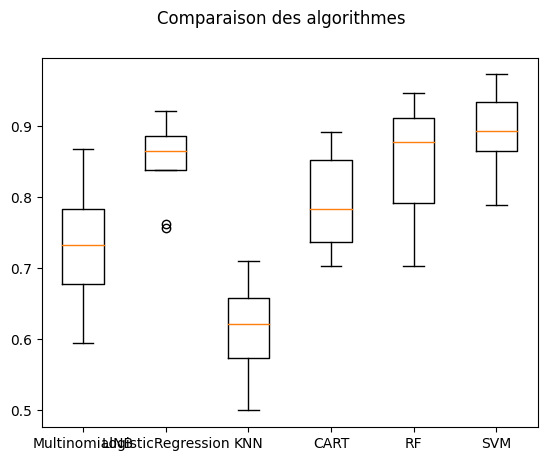

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.suptitle('Comparaison des algorithmes')
ax = fig.add_subplot(111)
plt.boxplot(scores)
ax.set_xticklabels(names)

### Choisir les meilleurs paramètres et hyperparamètres pour SVM, RF et LR : 



On a un pipeline pour chaque prétraitement différent, on essaye pas mal (miniscule, lemmatisation, miniscule + lemmatisation..) et on stocke le fit_transorm de nos X_train, X_test sur les pipelines dans des listes qui vont contenir tous les fit_transform des pipelines pour chaque classifieur, par la suite on parcourt ces listes là, on itère dessus, et chaque élement de la liste (train) va passer par le GridSearch et puis on predict sur son corresapondant dans liste (test).

grid search fait
Fitting 5 folds for each of 18 candidates, totalling 90 fits
meilleur score 0.901 

meilleur estimateur SVC(gamma=0.5, random_state=42) 

Accuracy : 0.968
Classification Report
              precision    recall  f1-score   support

       OTHER    0.97500   0.95122   0.96296        41
  TRUE/FALSE    0.96296   0.98113   0.97196        53

    accuracy                        0.96809        94
   macro avg    0.96898   0.96618   0.96746        94
weighted avg    0.96821   0.96809   0.96804        94

Ensemble des meilleurs paramètres :
	C: 1.0
	gamma: 0.5
	kernel: 'rbf'
grid search fait
Fitting 5 folds for each of 18 candidates, totalling 90 fits
meilleur score 0.901 

meilleur estimateur SVC(gamma=0.5, random_state=42) 

Accuracy : 0.968
Classification Report
              precision    recall  f1-score   support

       OTHER    0.97500   0.95122   0.96296        41
  TRUE/FALSE    0.96296   0.98113   0.97196        53

    accuracy                        0.96809       

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

meilleur score 0.837 

meilleur estimateur LogisticRegression(fit_intercept=False, random_state=42) 

Accuracy : 0.851
Classification Report
              precision    recall  f1-score   support

       OTHER    0.76471   0.95122   0.84783        41
  TRUE/FALSE    0.95349   0.77358   0.85417        53

    accuracy                        0.85106        94
   macro avg    0.85910   0.86240   0.85100        94
weighted avg    0.87115   0.85106   0.85140        94

Ensemble des meilleurs paramètres :
	penalty: 'l2'
	C: 1.0
	fit_intercept: False
	solver: 'lbfgs'
	max_iter: 100
grid search fait
Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

meilleur score 0.818 

meilleur estimateur LogisticRegression(penalty='none', random_state=42) 

Accuracy : 0.862
Classification Report
              precision    recall  f1-score   support

       OTHER    0.78000   0.95122   0.85714        41
  TRUE/FALSE    0.95455   0.79245   0.86598        53

    accuracy                        0.86170        94
   macro avg    0.86727   0.87184   0.86156        94
weighted avg    0.87841   0.86170   0.86213        94

Ensemble des meilleurs paramètres :
	penalty: 'none'
	C: 1.0
	fit_intercept: True
	solver: 'lbfgs'
	max_iter: 100
grid search fait
Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

meilleur score 0.818 

meilleur estimateur LogisticRegression(random_state=42, solver='liblinear') 

Accuracy : 0.851
Classification Report
              precision    recall  f1-score   support

       OTHER    0.76471   0.95122   0.84783        41
  TRUE/FALSE    0.95349   0.77358   0.85417        53

    accuracy                        0.85106        94
   macro avg    0.85910   0.86240   0.85100        94
weighted avg    0.87115   0.85106   0.85140        94

Ensemble des meilleurs paramètres :
	penalty: 'l2'
	C: 1.0
	fit_intercept: True
	solver: 'liblinear'
	max_iter: 100
grid search fait
Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

meilleur score 0.840 

meilleur estimateur LogisticRegression(fit_intercept=False, random_state=42) 

Accuracy : 0.819
Classification Report
              precision    recall  f1-score   support

       OTHER    0.72222   0.95122   0.82105        41
  TRUE/FALSE    0.95000   0.71698   0.81720        53

    accuracy                        0.81915        94
   macro avg    0.83611   0.83410   0.81913        94
weighted avg    0.85065   0.81915   0.81888        94

Ensemble des meilleurs paramètres :
	penalty: 'l2'
	C: 1.0
	fit_intercept: False
	solver: 'lbfgs'
	max_iter: 100
grid search fait
Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

meilleur score 0.845 

meilleur estimateur LogisticRegression(C=100, random_state=42) 

Accuracy : 0.894
Classification Report
              precision    recall  f1-score   support

       OTHER    0.82979   0.95122   0.88636        41
  TRUE/FALSE    0.95745   0.84906   0.90000        53

    accuracy                        0.89362        94
   macro avg    0.89362   0.90014   0.89318        94
weighted avg    0.90177   0.89362   0.89405        94

Ensemble des meilleurs paramètres :
	penalty: 'l2'
	C: 100
	fit_intercept: True
	solver: 'lbfgs'
	max_iter: 100
grid search fait
Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

meilleur score 0.866 

meilleur estimateur LogisticRegression(C=10, random_state=42) 

Accuracy : 0.894
Classification Report
              precision    recall  f1-score   support

       OTHER    0.82979   0.95122   0.88636        41
  TRUE/FALSE    0.95745   0.84906   0.90000        53

    accuracy                        0.89362        94
   macro avg    0.89362   0.90014   0.89318        94
weighted avg    0.90177   0.89362   0.89405        94

Ensemble des meilleurs paramètres :
	penalty: 'l2'
	C: 10
	fit_intercept: True
	solver: 'lbfgs'
	max_iter: 100
grid search fait
Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

meilleur score 0.882 

meilleur estimateur LogisticRegression(C=100, random_state=42) 

Accuracy : 0.862
Classification Report
              precision    recall  f1-score   support

       OTHER    0.78000   0.95122   0.85714        41
  TRUE/FALSE    0.95455   0.79245   0.86598        53

    accuracy                        0.86170        94
   macro avg    0.86727   0.87184   0.86156        94
weighted avg    0.87841   0.86170   0.86213        94

Ensemble des meilleurs paramètres :
	penalty: 'l2'
	C: 100
	fit_intercept: True
	solver: 'lbfgs'
	max_iter: 100
grid search fait
Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

meilleur score 0.864 

meilleur estimateur LogisticRegression(penalty='none', random_state=42) 

Accuracy : 0.894
Classification Report
              precision    recall  f1-score   support

       OTHER    0.82979   0.95122   0.88636        41
  TRUE/FALSE    0.95745   0.84906   0.90000        53

    accuracy                        0.89362        94
   macro avg    0.89362   0.90014   0.89318        94
weighted avg    0.90177   0.89362   0.89405        94

Ensemble des meilleurs paramètres :
	penalty: 'none'
	C: 1.0
	fit_intercept: True
	solver: 'lbfgs'
	max_iter: 100
grid search fait
Fitting 5 folds for each of 8 candidates, totalling 40 fits
meilleur score 0.864 

meilleur estimateur RandomForestClassifier(max_features='log2', random_state=42) 

Accuracy : 0.947
Classification Report
              precision    recall  f1-score   support

       OTHER    0.92857   0.95122   0.93976        41
  TRUE/FALSE    0.96154   0.94340   0.95238        53

    accuracy                        0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_plot/confusion_matrix.py:136: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


meilleur score 0.853 

meilleur estimateur RandomForestClassifier(n_estimators=200, random_state=42) 

Accuracy : 0.894
Classification Report
              precision    recall  f1-score   support

       OTHER    0.82979   0.95122   0.88636        41
  TRUE/FALSE    0.95745   0.84906   0.90000        53

    accuracy                        0.89362        94
   macro avg    0.89362   0.90014   0.89318        94
weighted avg    0.90177   0.89362   0.89405        94

Ensemble des meilleurs paramètres :
	n_estimators: 200
	max_features: 'sqrt'
grid search fait
Fitting 5 folds for each of 8 candidates, totalling 40 fits
meilleur score 0.853 

meilleur estimateur RandomForestClassifier(max_features='log2', random_state=42) 

Accuracy : 0.894
Classification Report
              precision    recall  f1-score   support

       OTHER    0.82979   0.95122   0.88636        41
  TRUE/FALSE    0.95745   0.84906   0.90000        53

    accuracy                        0.89362        94
   macro avg  

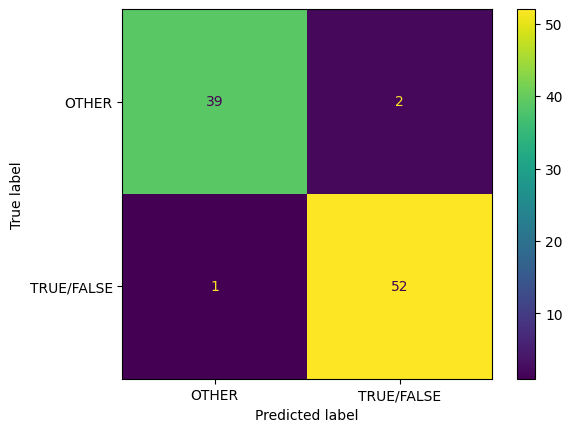

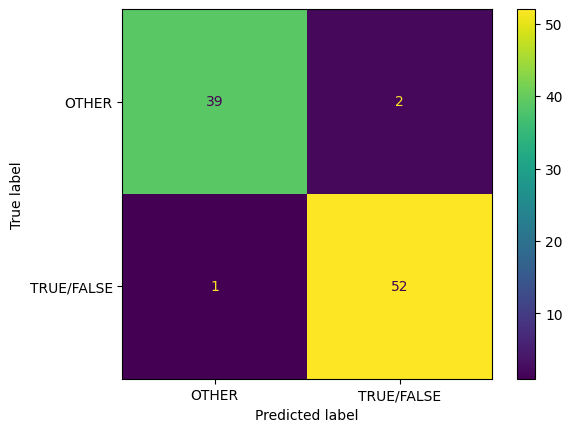

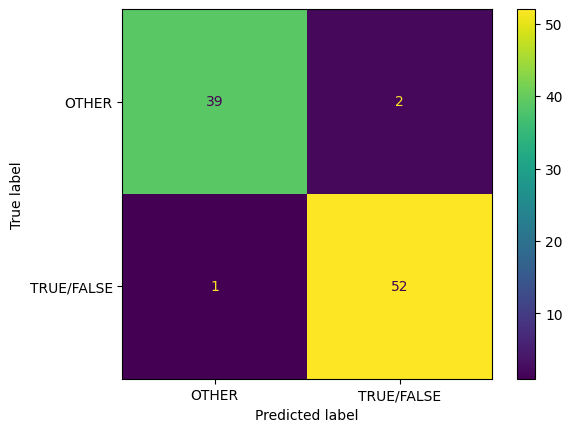

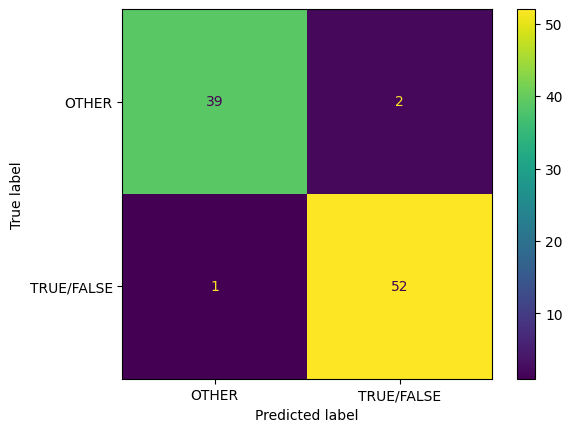

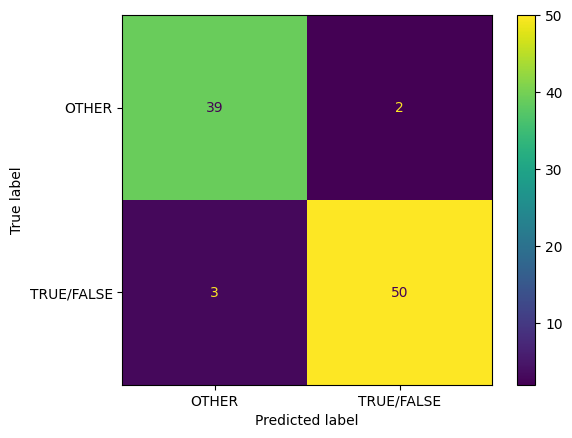

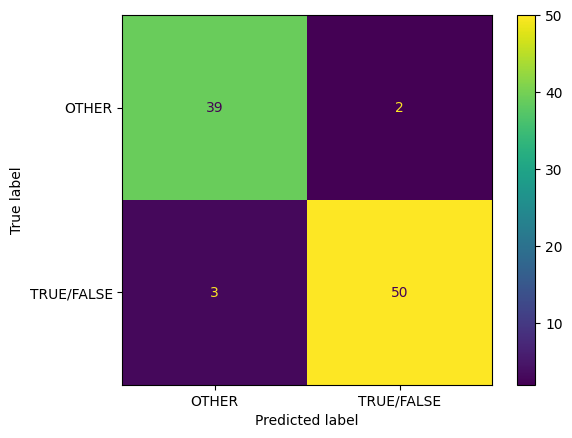

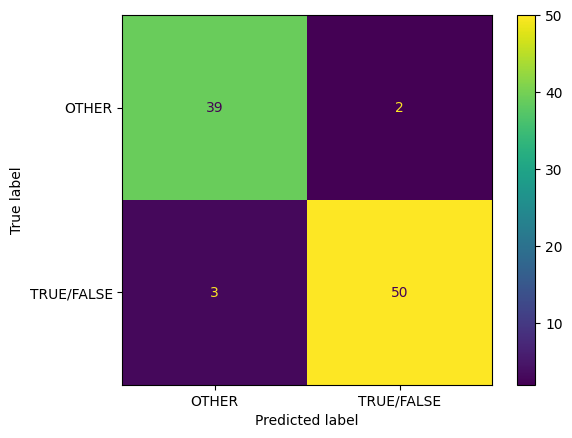

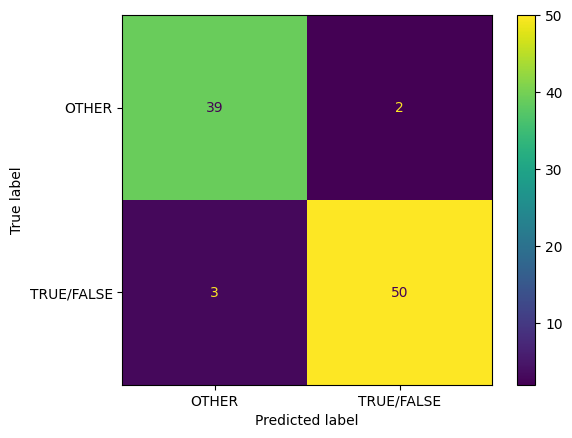

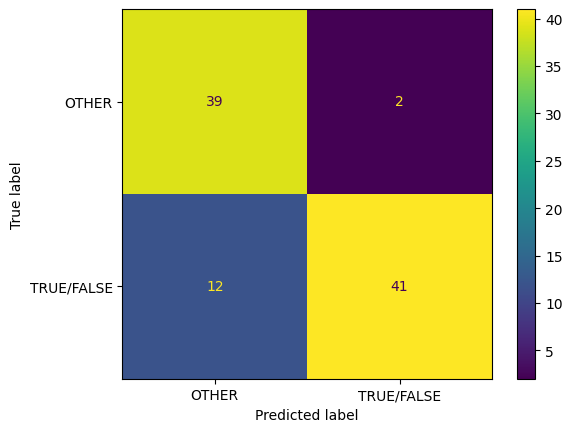

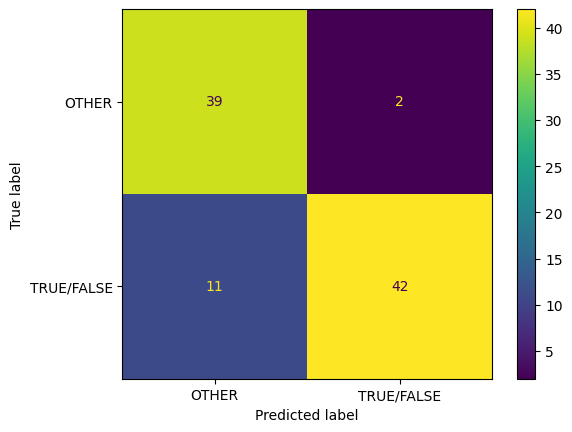

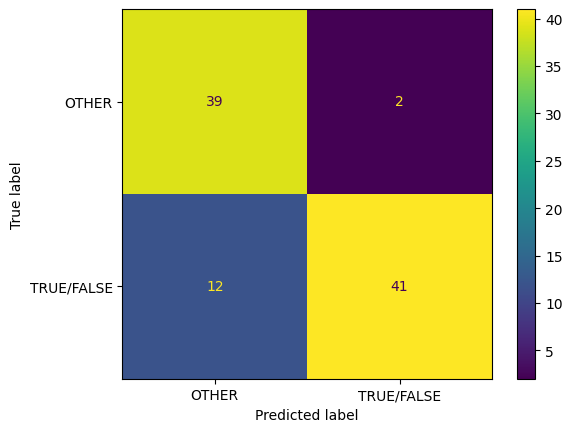

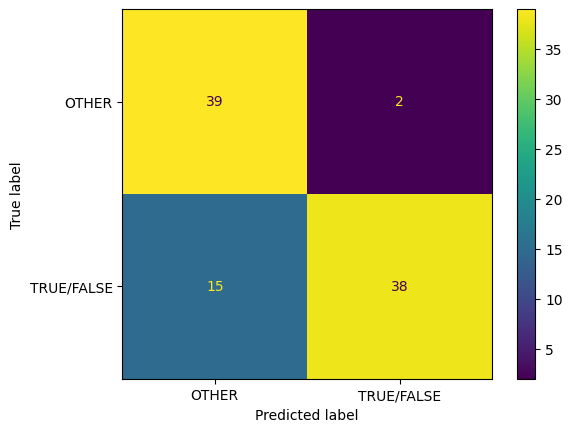

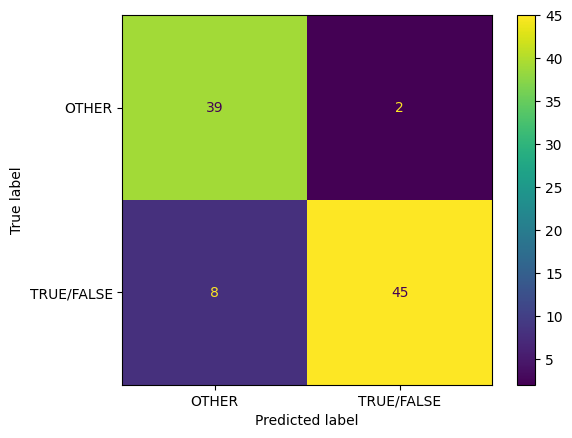

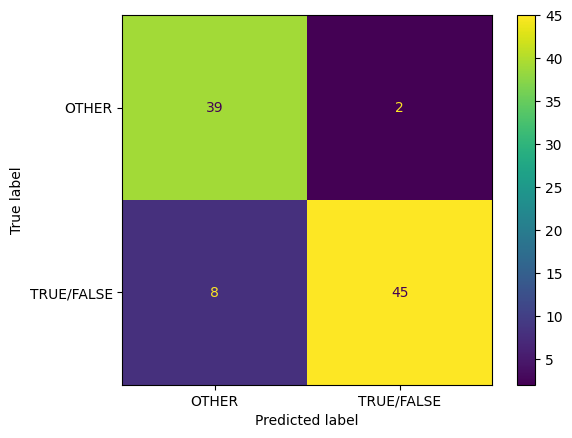

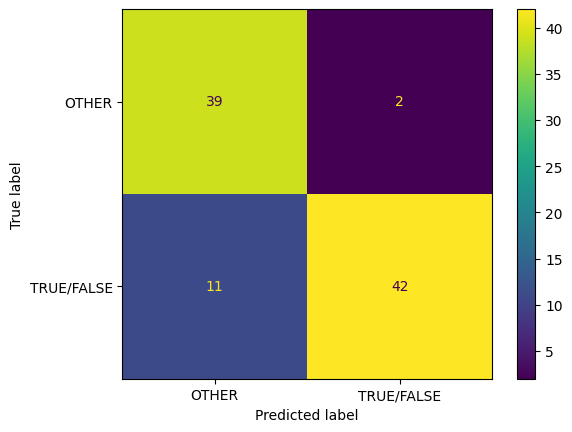

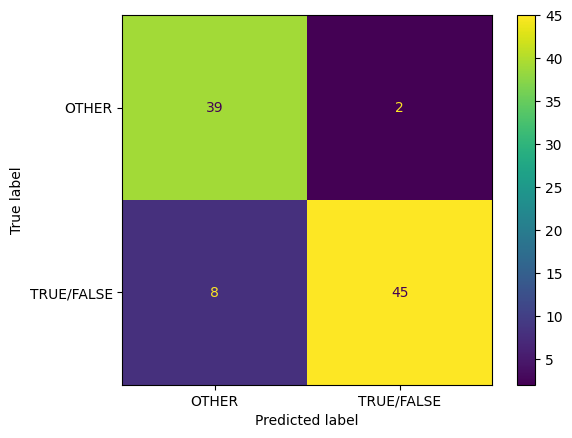

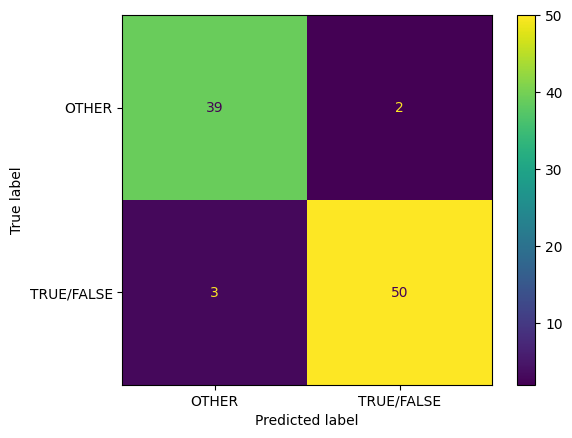

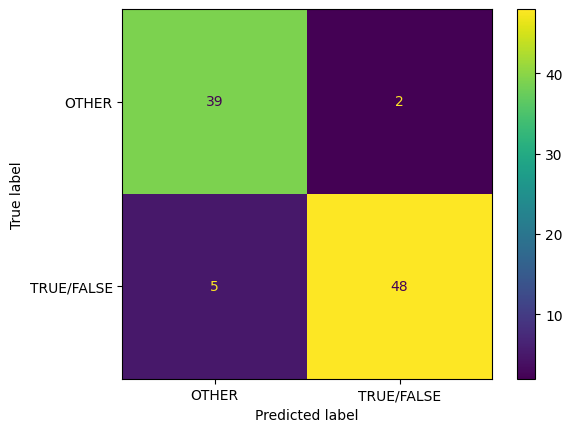

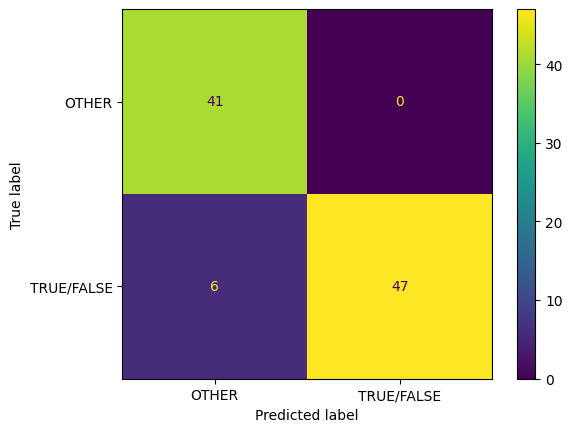

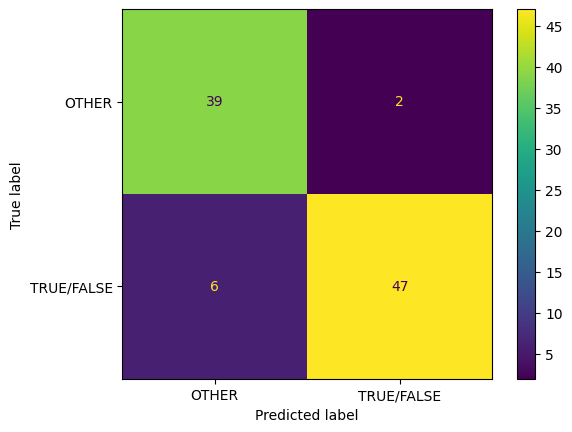

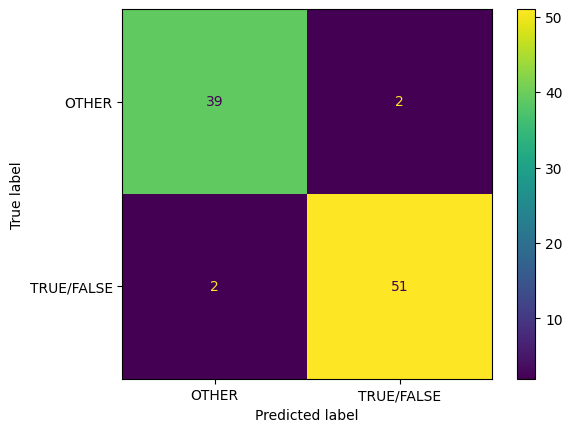

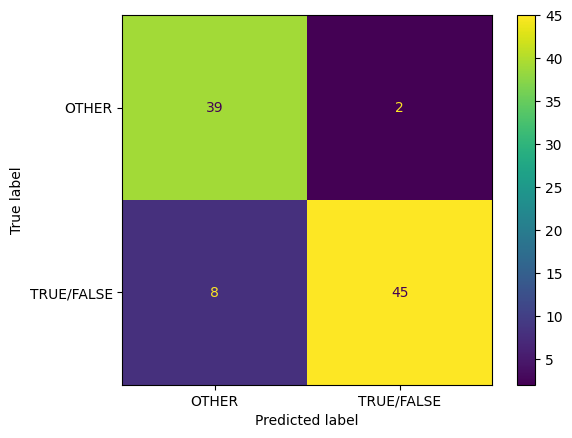

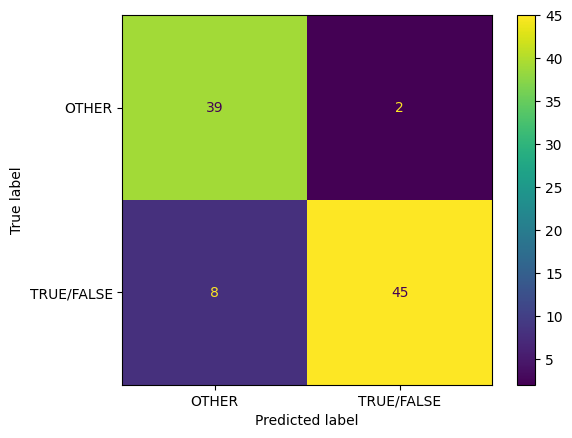

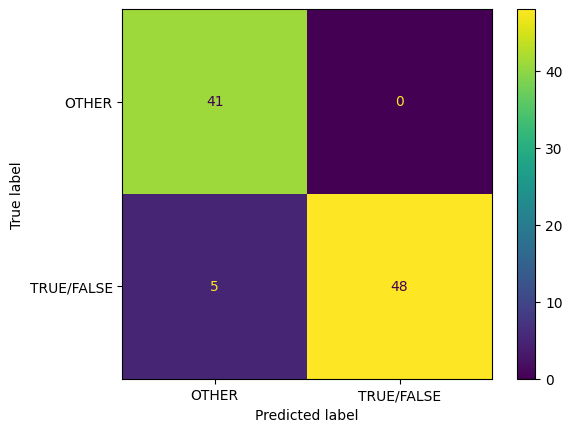

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from tabulate import tabulate

np.random.seed(42)  # Set the random seed for NumPy

# le plus simple est de faire un test sur differents pipelines.  
# pipeline de l'utilisation de CountVectorizer sur le texte avec differents pre-traitements
CV_brut = Pipeline([('cleaner', TextNormalizer()), 
                    ('count_vectorizer', CountVectorizer(lowercase=False))])
CV_lowcase = Pipeline([('cleaner', TextNormalizer(removestopwords=False,lowercase=True,
                                               getstemmer=False,removedigit=False)), 
                    ('count_vectorizer', CountVectorizer(lowercase=False))])
CV_lowStop = Pipeline([('cleaner', TextNormalizer(removestopwords=True,lowercase=True,
                                               getstemmer=False,removedigit=False)), 
                    ('count_vectorizer', CountVectorizer(lowercase=False))])

CV_lowStopstem = Pipeline([('cleaner', TextNormalizer(removestopwords=True,lowercase=True,
                                               getstemmer=True,removedigit=False)), 
                    ('count_vectorizer', CountVectorizer(lowercase=False))])

# pipeline de l'utilisation de TfidfVectorizer avec differents pre-traitements
TFIDF_brut = Pipeline ([('cleaner', TextNormalizer()), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False))])

TFIDF_lowcase = Pipeline([('cleaner', TextNormalizer(removestopwords=False,lowercase=True,
                                               getstemmer=False,removedigit=False)), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False))])
TFIDF_lowStop = Pipeline([('cleaner', TextNormalizer(removestopwords=True,lowercase=True,
                                               getstemmer=False,removedigit=False)), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False))])

TFIDF_lowStopstem = Pipeline([('cleaner', TextNormalizer(removestopwords=True,lowercase=True,
                                               getstemmer=True,removedigit=False)), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False))])


# Liste de tous les modeles à tester
all_models = [
    ("CV_brut", CV_brut),
    ("CV_lowcase", CV_lowcase),
    ("CV_lowStop", CV_lowStop),
    ("CV_lowStopstem",CV_lowStopstem),
    ("TFIDF_lowcase", TFIDF_lowcase),
    ("TFIDF_lowStop", TFIDF_lowStop),
    ("TFIDF_lowStopstem",TFIDF_lowStopstem),
    ("TFIDF_brut", TFIDF_brut)
]

#on crée des listes qui vont contenir les fit_transform des pipelines sur le X_train et X_test
X_train_text_SVC = []
X_test_text_SVC = []

X_train_text_RandomForestClassifier = []
X_test_text_RandomForestClassifier = []

X_train_text_LogisticRegression = []
X_test_text_LogisticRegression = []

for name, pipeline in all_models :
    X_train_text_SVC.append(pipeline.fit_transform(X_train_text).toarray())
    X_test_text_SVC.append(pipeline.transform(X_test_text).toarray())
    X_train_text_RandomForestClassifier.append(pipeline.fit_transform(X_train_text).toarray())
    X_test_text_RandomForestClassifier.append(pipeline.transform(X_test_text).toarray())
    X_train_text_LogisticRegression.append(pipeline.fit_transform(X_train_text).toarray())
    X_test_text_LogisticRegression.append(pipeline.transform(X_test_text).toarray())


models = {
    'SVC': SVC(random_state=42),
    'LogisticRegression' : LogisticRegression(random_state=42),
    'RandomForestClassifier': RandomForestClassifier(random_state=42)
}
    

params = {'SVC': [{'C': [0.001, 0.01, 0.1, 1,2,5,7,10]},
             {'gamma': [0.001, 0.01, 0.1,0.2,0.3,0.5,0.7,1]},
             {'kernel': ['linear', 'rbf']}],
    'RandomForestClassifier': [{'n_estimators': [10, 50, 100, 200, 300]},
                              {'max_features': ['auto', 'sqrt', 'log2']}],
    'LogisticRegression': [{'penalty': ['l1', 'l2','elasticnet', 'none']},
                              {'C': [0.001, 0.01, 0.1, 1, 10, 100]},
                              {'fit_intercept': [True,False]},
                              {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},
                              {'max_iter': [100, 1000, 10000]}]
}
#On itère sur le dictionnaire des modèles
for model_name, model in models.items():
    score='accuracy'
    X_train_text = eval('X_train_text_' + model_name) #On crée une variable X_train_text qui est dynamique qui est la liste du fit_transform du X_train d'un classifieur
    X_test_text = eval('X_test_text_' + model_name) #On crée une variable X_test_text qui est dynamique qui est la liste du fit_transform du X_test d'un classifieur
    for i in range (len(X_train_text)): #on itère sur cette liste
      grid_search = GridSearchCV(model, params[model_name], n_jobs=-1,  verbose=1,scoring=score) #on applique le GridSearch
      print("grid search fait")
      grid_search.fit(X_train_text[i],y_train)
      print ('meilleur score %0.3f'%(grid_search.best_score_),'\n')
      print ('meilleur estimateur',grid_search.best_estimator_,'\n')
      y_pred = grid_search.predict(X_test_text[i]) #on predict
      MyshowAllScores(y_test,y_pred) #matrice de confusion report classification
      
      print("Ensemble des meilleurs paramètres :")
      best_parameters = grid_search.best_estimator_.get_params()
      for param_dict in params[model_name]:
        for param_name, param_value in param_dict.items():
            print("\t%s: %r" % (param_name, best_parameters[param_name]))

##**Etape 3 : Classification selon la colonne TITRE :**

Vu qu'on va travailler sur la colonne titre, on va séléctionner cette dernière depuis le X_train et X_test pour apprendre et tester après.

In [ ]:
X_train_title = X_train['title']
X_train_title.reset_index(drop = True, inplace = True)
X_test_title = X_test['title']
X_test_title.reset_index(drop = True, inplace = True)

**Ici, c'est une étape importante,** on va tester différents classifieurs, pour chacun des classifieurs, on va appliquer le prétraitement + Vectorisation TfIdf, et on applique une cross_val_score avec un Kfold de 10 fois, par la suite on stocke dans une liste all_results la moyenne des accuracy + l'écart type et on la trie par ordre décroissant de moyenne d'accuracy et d'écart type. on remarque que les 2 meilleurs sont SVM et RF qu'on va séléctionner pour leur appliquer le GridSearch sur les paramètres des prétraitements + leurs hyperparamètres pour pouvoir choisir le meilleur.

In [ ]:
np.random.seed(42)  # Set the random seed for NumPy

score = 'accuracy'
seed = 7        
allresults = []
results = []
names = []


# Liste des modèles à tester
models = [
    ('MultinomialNB', MultinomialNB()),
    ('LogisticRegression', LogisticRegression(random_state=42)),
    ('KNN', KNeighborsClassifier()),
    ('CART', DecisionTreeClassifier(random_state=42)),
    ('RF', RandomForestClassifier(random_state=42)),
    ('SVM', SVC(random_state=42))
]


# Création d'un pipeline pour chaque modèle
pipelines = []
for name,model in models:
    pipeline = Pipeline([
        ('normalize', TextNormalizer()),
        ('tfidf', TfidfVectorizer()),
        (name,model)
    ])
    pipelines.append((name,pipeline))

all_results=[]
scores=[]
names=[]
for p in pipelines:
    print(p[1])
    # cross validation en 10 fois
    kfold = KFold(n_splits=10,random_state=seed,shuffle=True)
    start_time = time.time()
    # application de la classification
    cv_results = cross_val_score(p[1],X_train_title,y_train, cv=kfold, scoring=score)
    scores.append(cv_results)
    names.append(p[0])
    all_results.append((p[0],cv_results.mean(),cv_results.std()))
    end_time = time.time()


all_results = sorted(all_results, key=lambda x: (-x[1], -x[2]))
print("all resultats", all_results)

Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('MultinomialNB', MultinomialNB())])
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('LogisticRegression', LogisticRegression(random_state=42))])
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('KNN', KNeighborsClassifier())])
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('CART', DecisionTreeClassifier(random_state=42))])
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('RF', RandomForestClassifier(random_state=42))])
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('SVM', SVC(random_state=42))])
all resultats [('SVM', 0.9172119487908962, 0.046935427835051634), ('RF', 0.82375533428165, 0.04554453420366589), ('LogisticRegression', 0.8211237553342817, 0.03992

On affiche les accuracy de chaque classifieur, on remarque la médiane (en rouge) de chaque et l'écart type aussi.

[Text(1, 0, 'MultinomialNB'),
 Text(2, 0, 'LogisticRegression'),
 Text(3, 0, 'KNN'),
 Text(4, 0, 'CART'),
 Text(5, 0, 'RF'),
 Text(6, 0, 'SVM')]

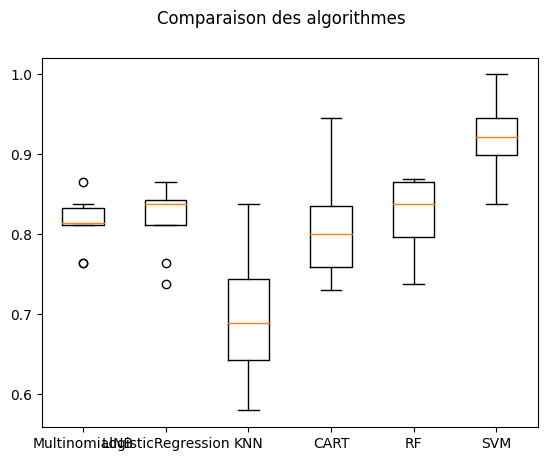

In [ ]:
fig = plt.figure()
fig.suptitle('Comparaison des algorithmes')
ax = fig.add_subplot(111)
plt.boxplot(scores)
ax.set_xticklabels(names)

### Choisir les meilleurs paramètres pour SVM et RF : 


On a un pipeline pour chaque prétraitement différent, on essaye pas mal (miniscule, lemmatisation, miniscule + lemmatisation..) et on stocke le fit_transorm de nos X_train, X_test sur les pipelines dans des listes qui vont contenir tous les fit_transform des pipelines pour chaque classifieur, par la suite on parcourt ces listes là, on itère dessus, et chaque élement de la liste (train) va passer par le GridSearch et puis on predict sur son corresapondant dans liste (test).

grid search fait
Fitting 5 folds for each of 18 candidates, totalling 90 fits
meilleur score 0.906 

meilleur estimateur SVC(gamma=0.3, random_state=42) 

Accuracy : 0.894
Classification Report
              precision    recall  f1-score   support

       OTHER    0.82979   0.95122   0.88636        41
  TRUE/FALSE    0.95745   0.84906   0.90000        53

    accuracy                        0.89362        94
   macro avg    0.89362   0.90014   0.89318        94
weighted avg    0.90177   0.89362   0.89405        94

Ensemble des meilleurs paramètres :
	C: 1.0
	gamma: 0.3
	kernel: 'rbf'
grid search fait
Fitting 5 folds for each of 18 candidates, totalling 90 fits
meilleur score 0.901 

meilleur estimateur SVC(gamma=0.3, random_state=42) 

Accuracy : 0.904
Classification Report
              precision    recall  f1-score   support

       OTHER    0.84783   0.95122   0.89655        41
  TRUE/FALSE    0.95833   0.86792   0.91089        53

    accuracy                        0.90426       

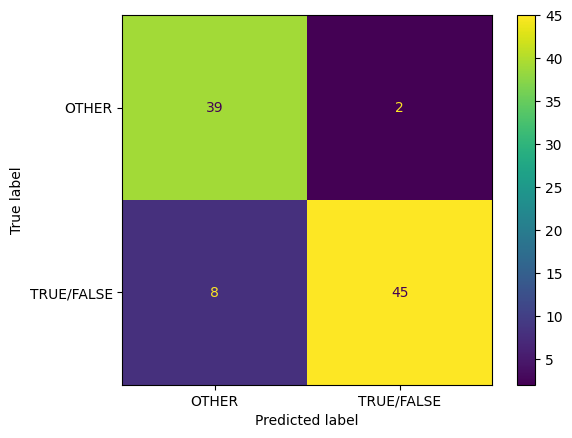

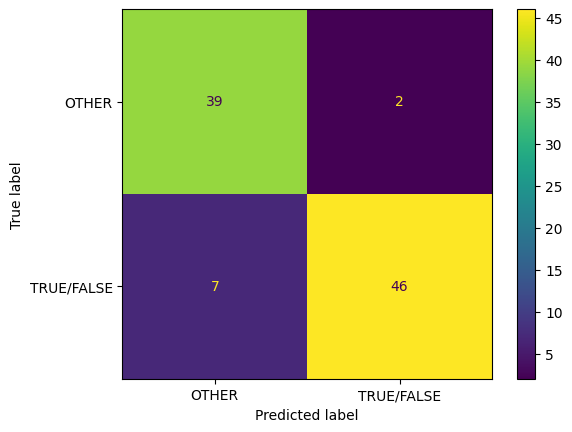

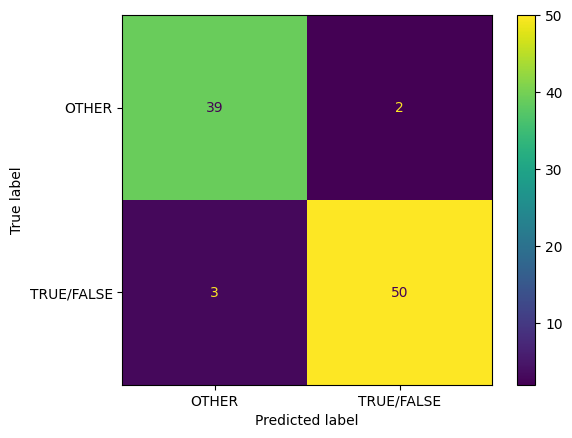

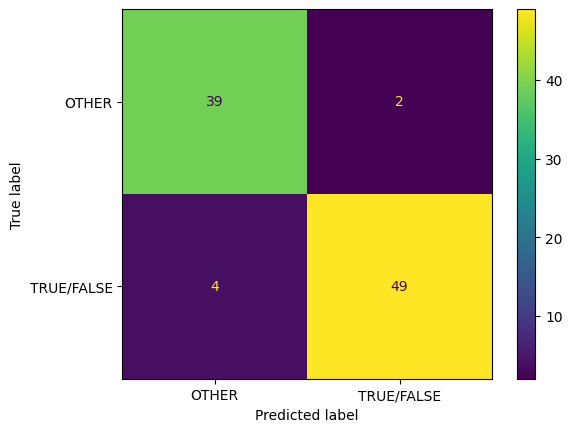

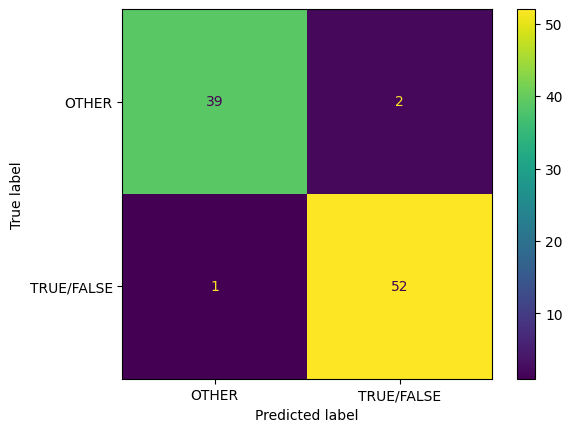

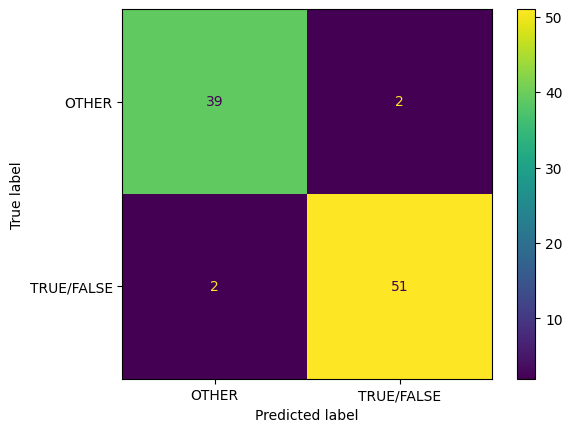

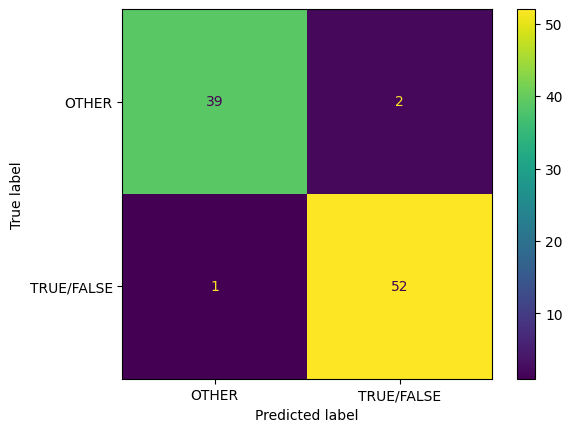

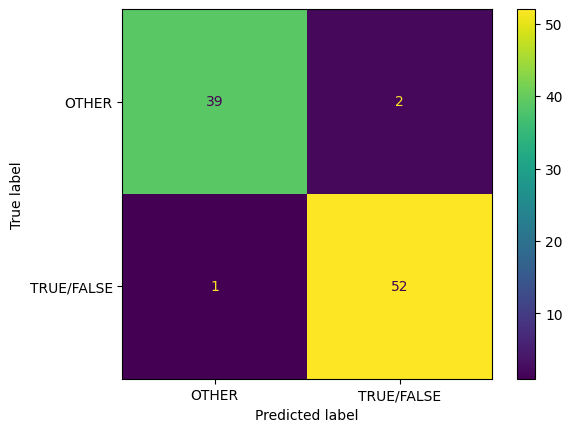

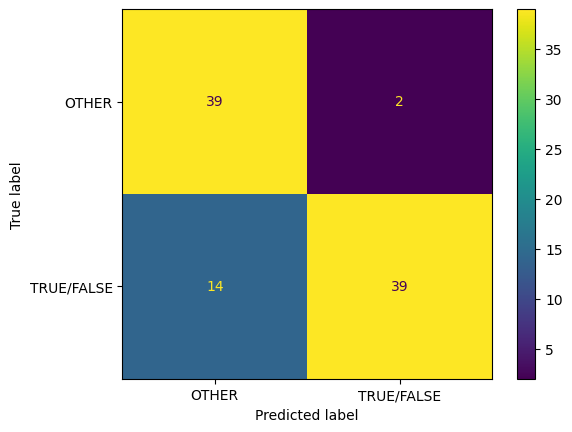

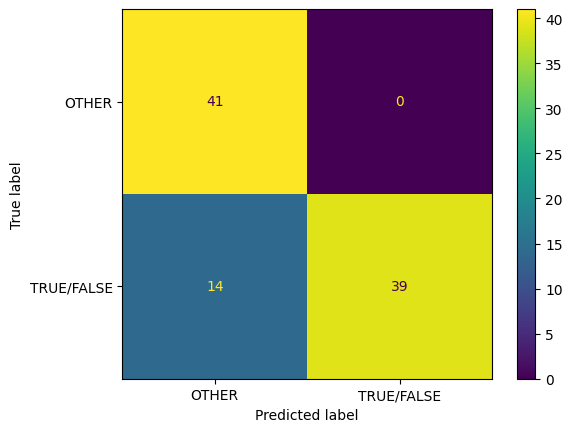

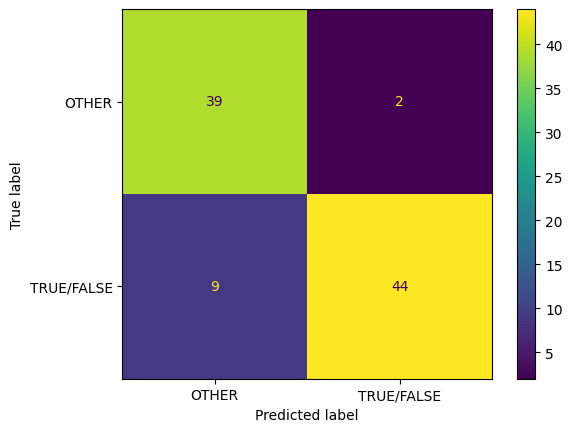

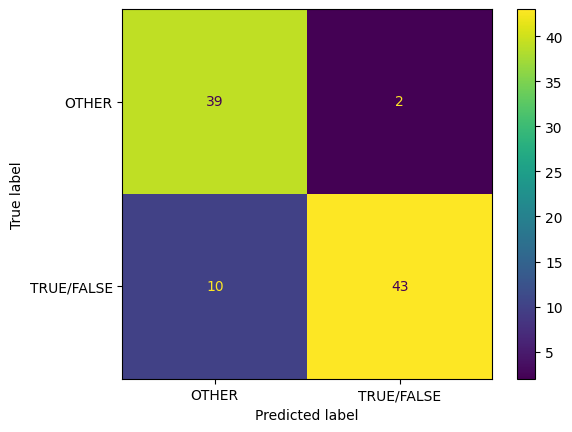

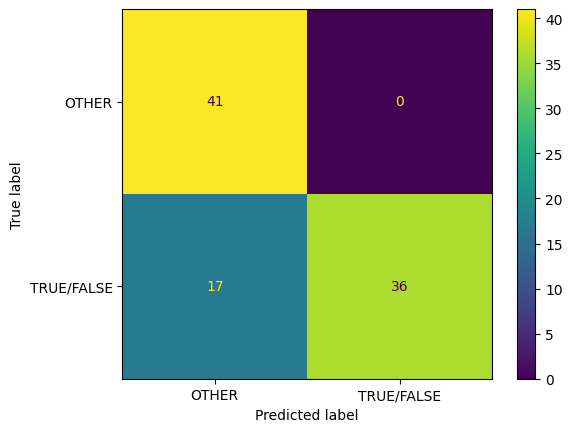

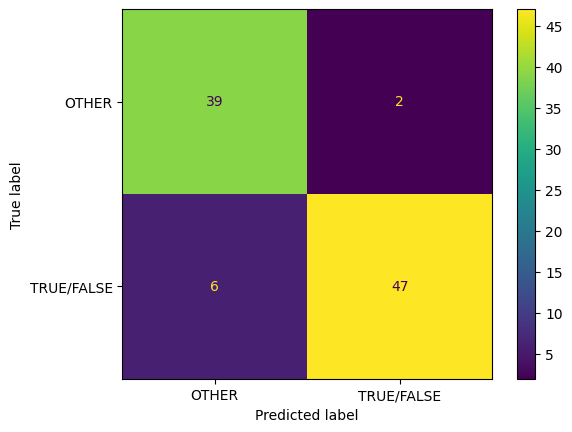

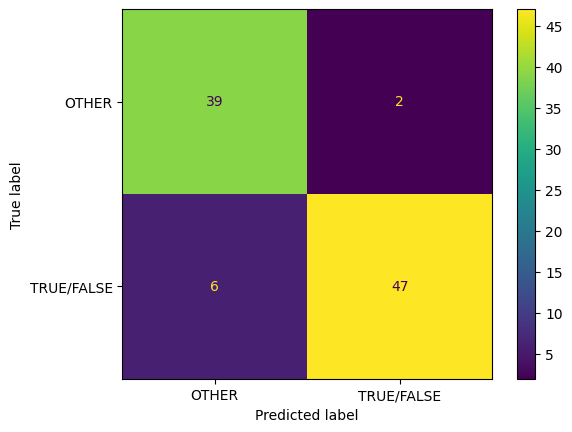

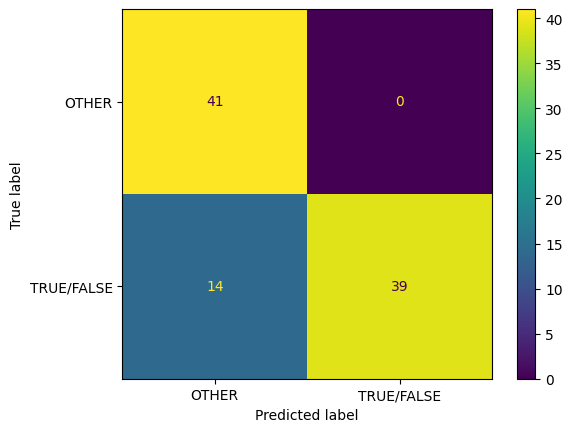

In [ ]:
np.random.seed(42)  # Set the random seed for NumPy

# le plus simple est de faire un test sur differents pipelines.  
# pipeline de l'utilisation de CountVectorizer sur le texte avec differents pre-traitements
CV_brut = Pipeline([('cleaner', TextNormalizer()), 
                    ('count_vectorizer', CountVectorizer(lowercase=False))])
CV_lowcase = Pipeline([('cleaner', TextNormalizer(removestopwords=False,lowercase=True,
                                               getstemmer=False,removedigit=False)), 
                    ('count_vectorizer', CountVectorizer(lowercase=False))])
CV_lowStop = Pipeline([('cleaner', TextNormalizer(removestopwords=True,lowercase=True,
                                               getstemmer=False,removedigit=False)), 
                    ('count_vectorizer', CountVectorizer(lowercase=False))])

CV_lowStopstem = Pipeline([('cleaner', TextNormalizer(removestopwords=True,lowercase=True,
                                               getstemmer=True,removedigit=False)), 
                    ('count_vectorizer', CountVectorizer(lowercase=False))])

# pipeline de l'utilisation de TfidfVectorizer avec differents pre-traitements
TFIDF_brut = Pipeline ([('cleaner', TextNormalizer()), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False))])

TFIDF_lowcase = Pipeline([('cleaner', TextNormalizer(removestopwords=False,lowercase=True,
                                               getstemmer=False,removedigit=False)), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False))])
TFIDF_lowStop = Pipeline([('cleaner', TextNormalizer(removestopwords=True,lowercase=True,
                                               getstemmer=False,removedigit=False)), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False))])

TFIDF_lowStopstem = Pipeline([('cleaner', TextNormalizer(removestopwords=True,lowercase=True,
                                               getstemmer=True,removedigit=False)), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False))])


# Liste de tous les modeles à tester
all_models = [
    ("CV_brut", CV_brut),
    ("CV_lowcase", CV_lowcase),
    ("CV_lowStop", CV_lowStop),
    ("CV_lowStopstem",CV_lowStopstem),
    ("TFIDF_lowcase", TFIDF_lowcase),
    ("TFIDF_lowStop", TFIDF_lowStop),
    ("TFIDF_lowStopstem",TFIDF_lowStopstem),
    ("TFIDF_brut", TFIDF_brut)
]

X_train_title_SVC = []
X_test_title_SVC = []

X_train_title_RandomForestClassifier = []
X_test_title_RandomForestClassifier = []


for name, pipeline in all_models :
    X_train_title_SVC.append(pipeline.fit_transform(X_train_title).toarray())
    X_test_title_SVC.append(pipeline.transform(X_test_title).toarray())
    X_train_title_RandomForestClassifier.append(pipeline.fit_transform(X_train_title).toarray())
    X_test_title_RandomForestClassifier.append(pipeline.transform(X_test_title).toarray())


models = {
    'SVC': SVC(random_state=42),
    'RandomForestClassifier': RandomForestClassifier(random_state=42)
}
    

params = {'SVC': [{'C': [0.001, 0.01, 0.1, 1,2,5,7,10]},
             {'gamma': [0.001, 0.01, 0.1,0.2,0.3,0.5,0.7,1]},
             {'kernel': ['linear', 'rbf']}],
    'RandomForestClassifier': [{'n_estimators': [10, 50, 100, 200, 300]},
                              {'max_features': ['auto', 'sqrt', 'log2']}]
}

for model_name, model in models.items():
    score='accuracy'
    X_train_title = eval('X_train_title_' + model_name)
    X_test_title = eval('X_test_title_' + model_name)
    for i in range (len(X_train_title)):
      grid_search = GridSearchCV(model, params[model_name], n_jobs=-1,  verbose=1,scoring=score)
      print("grid search fait")
      grid_search.fit(X_train_title[i],y_train)
      print ('meilleur score %0.3f'%(grid_search.best_score_),'\n')
      print ('meilleur estimateur',grid_search.best_estimator_,'\n')
      y_pred = grid_search.predict(X_test_title[i])
      MyshowAllScores(y_test,y_pred)
      
      print("Ensemble des meilleurs paramètres :")
      best_parameters = grid_search.best_estimator_.get_params()
      for param_dict in params[model_name]:
        for param_name, param_value in param_dict.items():
            print("\t%s: %r" % (param_name, best_parameters[param_name]))

##**Etape 4 : Classification selon le TITRE ET TEXT ENSEMBLE (Concaténés):**

* On va à partir de X_train concaténer les 2 colonnes TEXT et TITLE en mettant un espace entre les deux 
* Vu qu'on va travailler sur la colonne text_titre qu'on vient de créer, on va séléctionner cette dernière depuis le X_train et X_test pour apprendre et tester après.

In [ ]:
train_text_title = X_train.apply(lambda x : '{} {}'.format(x['text'],x['title']),axis=1)
test_text_title = X_test.apply(lambda x : '{} {}'.format(x['text'],x['title']),axis=1)

X_train['text_title'] = train_text_title
X_train_text_title = X_train['text_title']
X_train_text_title.reset_index(drop = True, inplace = True)

X_test['text_title'] = test_text_title
X_test_text_title = X_test['text_title']
X_test_text_title.reset_index(drop = True, inplace = True)

print("le texte et titre du train sont")
display(X_train_text_title)

print("le texte et titre du test sont")
display(X_test_text_title)

le texte et titre du train sont


0      Historians may look to 2015 as the year when s...
1      Coronavirus may be sexually transmitted and ca...
2      Contractors bidding for work with the governme...
3      More CO2 would actually help the planet , says...
4      To say out-loud that you find the results of t...
                             ...                        
369    Last week, in the days leading up to Sanders’ ...
370    This is one in a series of articles taken from...
371    Food parcels arriving at the Community Service...
372    On Tuesday, radio show host John Fredricks sta...
373    A South African pastor, Alfred Ndlovu has died...
Name: text_title, Length: 374, dtype: object

le texte et titre du test sont


0     Thank you to Universities UK UUK for hosting u...
1     Can any government statistics on COVID-19 deat...
2     MOSCOW — Russian President Vladimir Putin over...
3     Please enable cookies on your web browser in o...
4     PUPILS aged just five have been accused of sex...
                            ...                        
89    With a smile on her face, City Clerk Susana Me...
90    It was an accurate and judicious answer, so na...
91    Barack Obama, a former President of the US, wa...
92    Pennsylvania rejects 372,000 mail-in ballots, ...
93    Rises in National Insurance Contributions NICS...
Name: text_title, Length: 94, dtype: object

**Ici, c'est une étape importante,** on va tester différents classifieurs, pour chacun des classifieurs, on va appliquer le prétraitement + Vectorisation TfIdf, et on applique une cross_val_score avec un Kfold de 10 fois, par la suite on stocke dans une liste all_results la moyenne des accuracy + l'écart type et on la trie par ordre décroissant de moyenne d'accuracy et d'écart type. on remarque que les 2 meilleurs sont SVM et RF qu'on va séléctionner pour leur appliquer le GridSearch sur les paramètres des prétraitements + leurs hyperparamètres pour pouvoir choisir le meilleur.

In [ ]:
np.random.seed(42)  # Set the random seed for NumPy

score = 'accuracy'
seed = 7        
allresults = []
results = []
names = []


# Liste des modèles à tester
models = [
    ('MultinomialNB', MultinomialNB()),
    ('LogisticRegression', LogisticRegression(random_state=42)),
    ('KNN', KNeighborsClassifier()),
    ('CART', DecisionTreeClassifier(random_state=42)),
    ('RF', RandomForestClassifier(random_state=42)),
    ('SVM', SVC(random_state=42))
]


# Création d'un pipeline pour chaque modèle
pipelines = []
for name,model in models:
    pipeline = Pipeline([
        ('normalize', TextNormalizer()),
        ('tfidf', TfidfVectorizer()),
        (name,model)
    ])
    pipelines.append((name,pipeline))

all_results=[]
scores=[]
names=[]
for p in pipelines:
    print(p[1])
    # cross validation en 10 fois
    kfold = KFold(n_splits=10,random_state=seed,shuffle=True)
    start_time = time.time()
    # application de la classification
    cv_results = cross_val_score(p[1],X_train_text_title,y_train, cv=kfold, scoring=score)
    scores.append(cv_results)
    names.append(p[0])
    all_results.append((p[0],cv_results.mean(),cv_results.std()))
    end_time = time.time()


all_results = sorted(all_results, key=lambda x: (-x[1], -x[2]))
print("all resultats", all_results)

Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('MultinomialNB', MultinomialNB())])
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('LogisticRegression', LogisticRegression(random_state=42))])
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('KNN', KNeighborsClassifier())])
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('CART', DecisionTreeClassifier(random_state=42))])
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('RF', RandomForestClassifier(random_state=42))])
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('SVM', SVC(random_state=42))])
all resultats [('SVM', 0.8876955903271693, 0.045964273722778934), ('RF', 0.8743954480796585, 0.05765956829705948), ('LogisticRegression', 0.8287339971550498, 0.057

On affiche les accuracy de chaque classifieur, on remarque la médiane (en rouge) de chaque et l'écart type aussi.

[Text(1, 0, 'MultinomialNB'),
 Text(2, 0, 'LogisticRegression'),
 Text(3, 0, 'KNN'),
 Text(4, 0, 'CART'),
 Text(5, 0, 'RF'),
 Text(6, 0, 'SVM')]

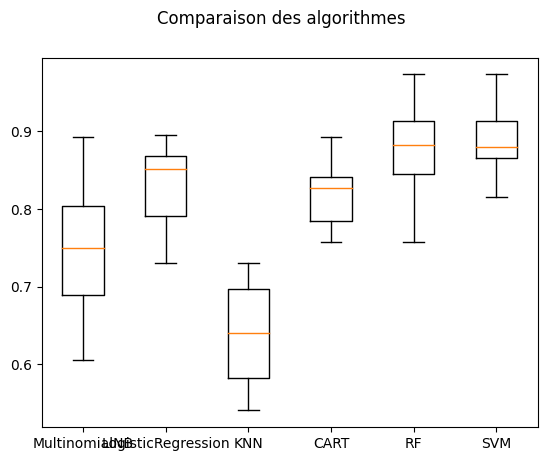

In [ ]:
fig = plt.figure()
fig.suptitle('Comparaison des algorithmes')
ax = fig.add_subplot(111)
plt.boxplot(scores)
ax.set_xticklabels(names)

### Choisir les meilleurs paramètres pour SVM et RF : 


On a un pipeline pour chaque prétraitement différent, on essaye pas mal (miniscule, lemmatisation, miniscule + lemmatisation..) et on stocke le fit_transorm de nos X_train, X_test sur les pipelines dans des listes qui vont contenir tous les fit_transform des pipelines pour chaque classifieur, par la suite on parcourt ces listes là, on itère dessus, et chaque élement de la liste (train) va passer par le GridSearch et puis on predict sur son corresapondant dans liste (test).

grid search fait
Fitting 5 folds for each of 18 candidates, totalling 90 fits
meilleur score 0.901 

meilleur estimateur SVC(gamma=0.2, random_state=42) 

Accuracy : 0.979
Classification Report
              precision    recall  f1-score   support

       OTHER    1.00000   0.95122   0.97500        41
  TRUE/FALSE    0.96364   1.00000   0.98148        53

    accuracy                        0.97872        94
   macro avg    0.98182   0.97561   0.97824        94
weighted avg    0.97950   0.97872   0.97865        94

Ensemble des meilleurs paramètres :
	C: 1.0
	gamma: 0.2
	kernel: 'rbf'
grid search fait
Fitting 5 folds for each of 18 candidates, totalling 90 fits
meilleur score 0.901 

meilleur estimateur SVC(gamma=0.2, random_state=42) 

Accuracy : 0.979
Classification Report
              precision    recall  f1-score   support

       OTHER    1.00000   0.95122   0.97500        41
  TRUE/FALSE    0.96364   1.00000   0.98148        53

    accuracy                        0.97872       

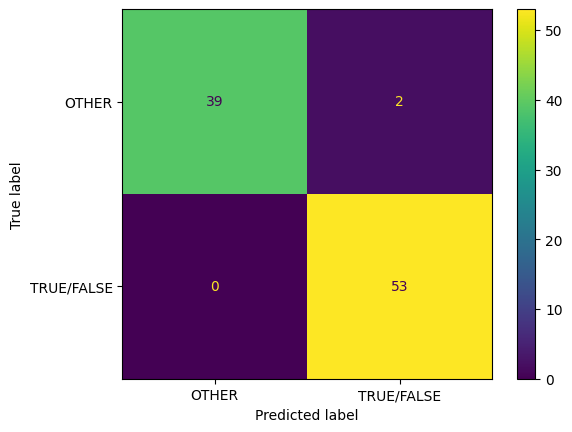

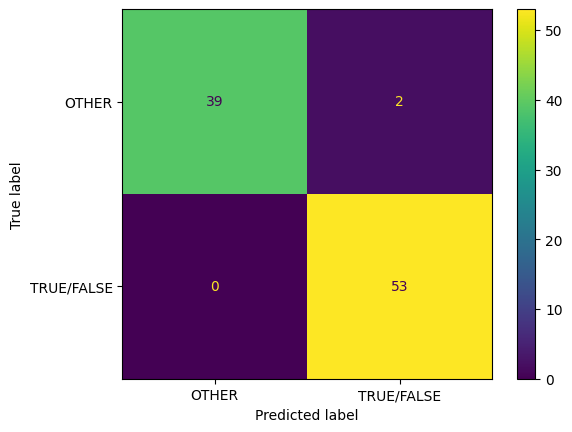

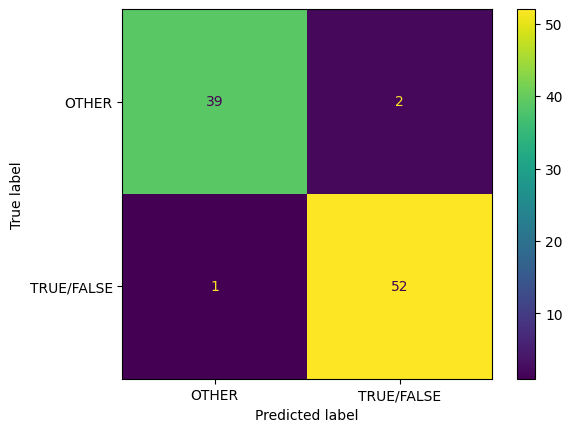

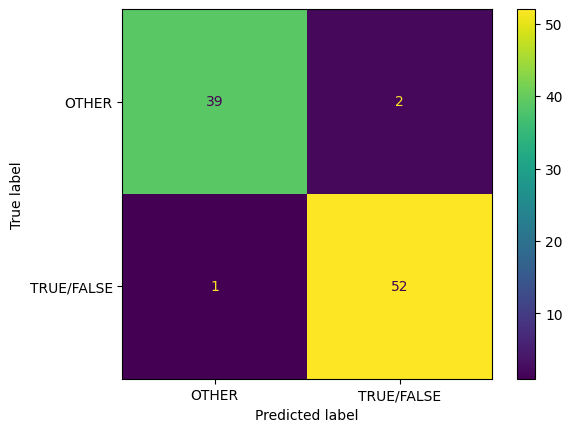

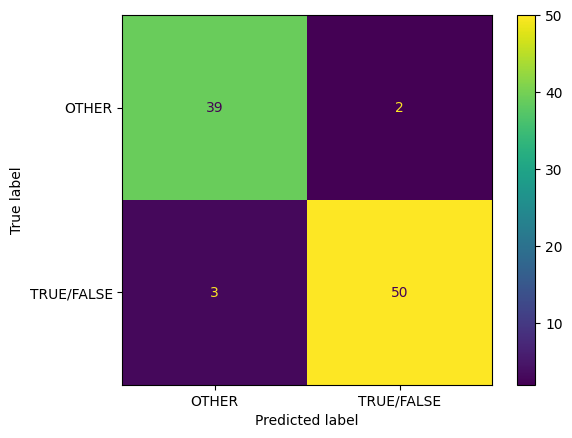

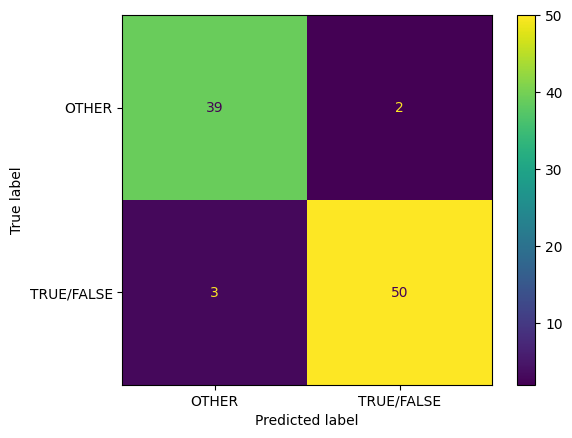

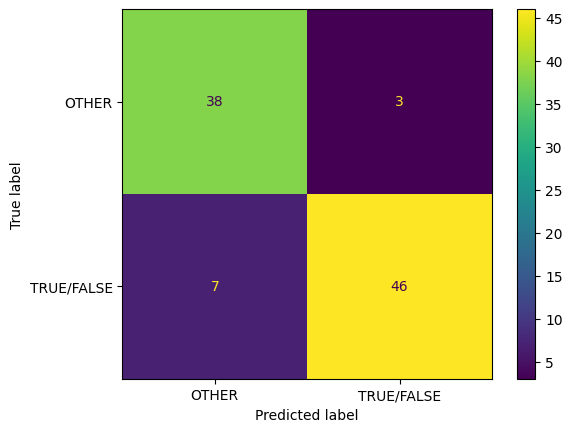

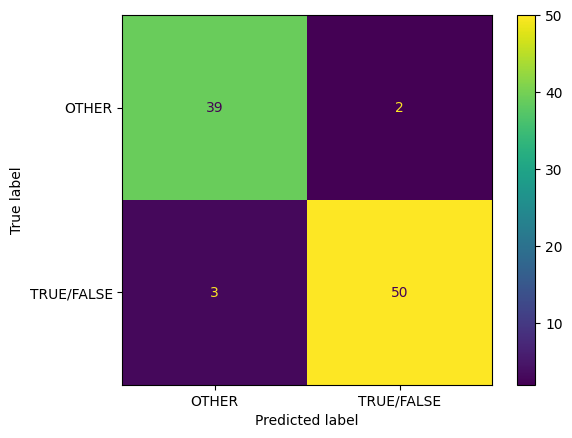

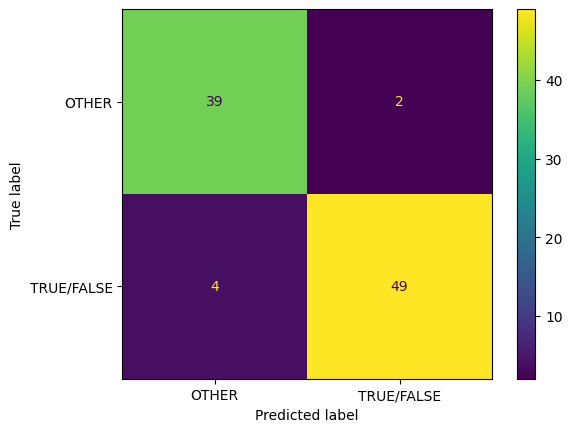

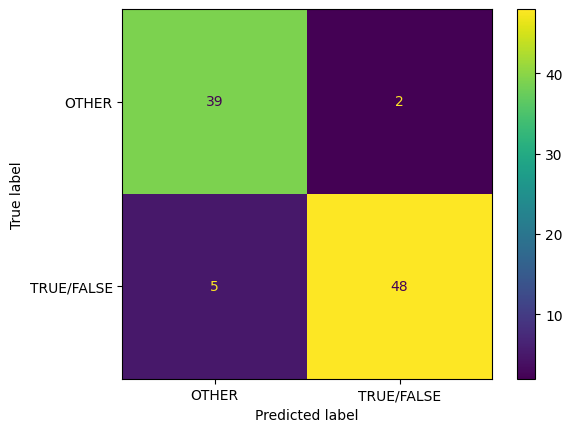

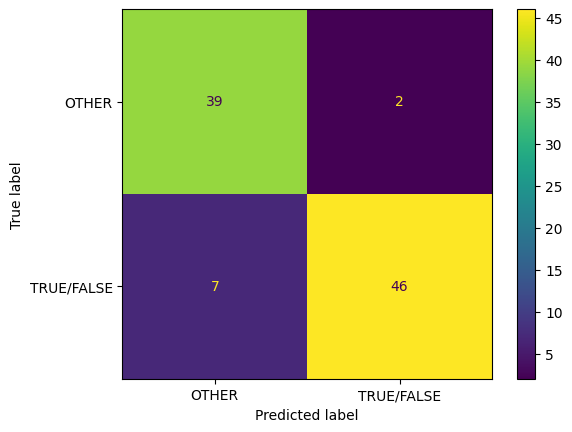

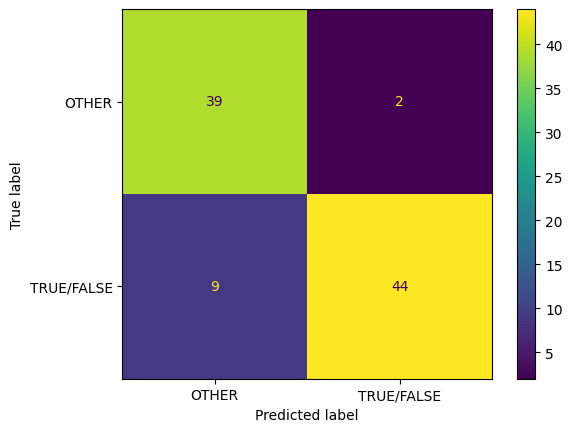

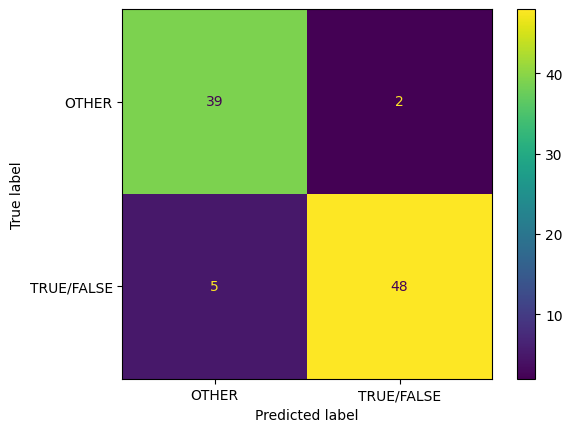

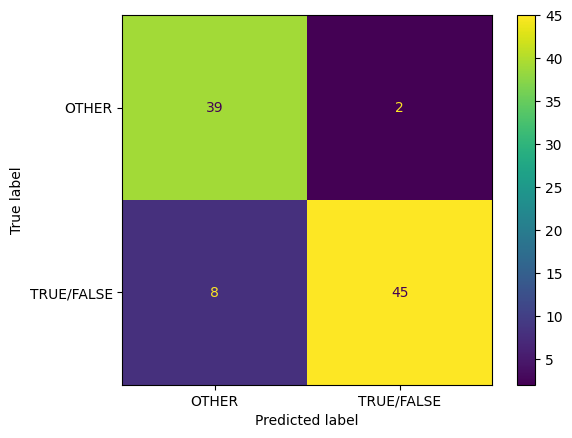

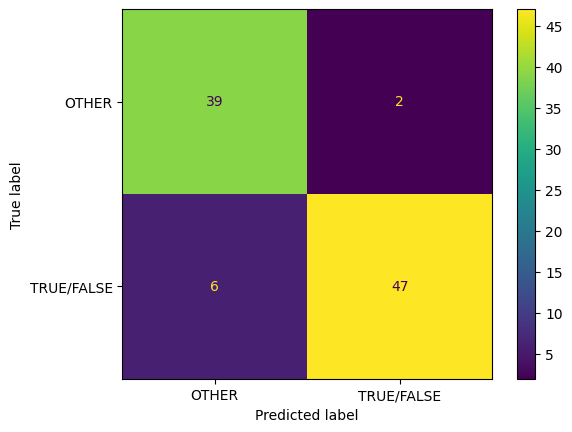

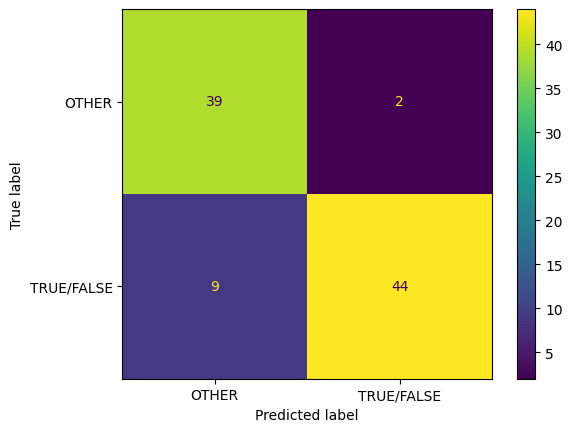

In [ ]:
np.random.seed(42)  # Set the random seed for NumPy

# le plus simple est de faire un test sur differents pipelines.  
# pipeline de l'utilisation de CountVectorizer sur le texte avec differents pre-traitements
CV_brut = Pipeline([('cleaner', TextNormalizer()), 
                    ('count_vectorizer', CountVectorizer(lowercase=False))])
CV_lowcase = Pipeline([('cleaner', TextNormalizer(removestopwords=False,lowercase=True,
                                               getstemmer=False,removedigit=False)), 
                    ('count_vectorizer', CountVectorizer(lowercase=False))])
CV_lowStop = Pipeline([('cleaner', TextNormalizer(removestopwords=True,lowercase=True,
                                               getstemmer=False,removedigit=False)), 
                    ('count_vectorizer', CountVectorizer(lowercase=False))])

CV_lowStopstem = Pipeline([('cleaner', TextNormalizer(removestopwords=True,lowercase=True,
                                               getstemmer=True,removedigit=False)), 
                    ('count_vectorizer', CountVectorizer(lowercase=False))])

# pipeline de l'utilisation de TfidfVectorizer avec differents pre-traitements
TFIDF_brut = Pipeline ([('cleaner', TextNormalizer()), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False))])

TFIDF_lowcase = Pipeline([('cleaner', TextNormalizer(removestopwords=False,lowercase=True,
                                               getstemmer=False,removedigit=False)), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False))])
TFIDF_lowStop = Pipeline([('cleaner', TextNormalizer(removestopwords=True,lowercase=True,
                                               getstemmer=False,removedigit=False)), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False))])

TFIDF_lowStopstem = Pipeline([('cleaner', TextNormalizer(removestopwords=True,lowercase=True,
                                               getstemmer=True,removedigit=False)), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False))])


# Liste de tous les modeles à tester
all_models = [
    ("CV_brut", CV_brut),
    ("CV_lowcase", CV_lowcase),
    ("CV_lowStop", CV_lowStop),
    ("CV_lowStopstem",CV_lowStopstem),
    ("TFIDF_lowcase", TFIDF_lowcase),
    ("TFIDF_lowStop", TFIDF_lowStop),
    ("TFIDF_lowStopstem",TFIDF_lowStopstem),
    ("TFIDF_brut", TFIDF_brut)
]

X_train_text_title_SVC = []
X_test_text_title_SVC = []

X_train_text_title_RandomForestClassifier = []
X_test_text_title_RandomForestClassifier = []


for name, pipeline in all_models :
    X_train_text_title_SVC.append(pipeline.fit_transform(X_train_text_title).toarray())
    X_test_text_title_SVC.append(pipeline.transform(X_test_text_title).toarray())
    X_train_text_title_RandomForestClassifier.append(pipeline.fit_transform(X_train_text_title).toarray())
    X_test_text_title_RandomForestClassifier.append(pipeline.transform(X_test_text_title).toarray())


models = {
    'SVC': SVC(random_state=42),
    'RandomForestClassifier': RandomForestClassifier(random_state=42)
}
    

params = {'SVC': [{'C': [0.001, 0.01, 0.1, 1,2,5,7,10]},
             {'gamma': [0.001, 0.01, 0.1,0.2,0.3,0.5,0.7,1]},
             {'kernel': ['linear', 'rbf']}],
    'RandomForestClassifier': [{'n_estimators': [10, 50, 100, 200, 300]},
                              {'max_features': ['auto', 'sqrt', 'log2']}]
}

for model_name, model in models.items():
    score='accuracy'
    X_train_text_title = eval('X_train_text_title_' + model_name)
    X_test_text_title = eval('X_test_text_title_' + model_name)
    for i in range (len(X_train_text_title)):
      grid_search = GridSearchCV(model, params[model_name], n_jobs=-1,  verbose=1,scoring=score)
      print("grid search fait")
      grid_search.fit(X_train_text_title[i],y_train)
      print ('meilleur score %0.3f'%(grid_search.best_score_),'\n')
      print ('meilleur estimateur',grid_search.best_estimator_,'\n')
      y_pred = grid_search.predict(X_test_text_title[i])
      MyshowAllScores(y_test,y_pred)
      
      print("Ensemble des meilleurs paramètres :")
      best_parameters = grid_search.best_estimator_.get_params()
      for param_dict in params[model_name]:
        for param_name, param_value in param_dict.items():
            print("\t%s: %r" % (param_name, best_parameters[param_name]))

#Visualisation :

In [ ]:
!pip install umap-learn[plot]
!pip install holoviews
!pip install -U ipykernel

In [ ]:
from sklearn.decomposition import TruncatedSVD
import plotly.express as px
from sklearn.manifold import TSNE
# Umap 
import umap.plot
from umap import UMAP

X_test_copy = X_test.copy()

tfidf=TfidfVectorizer()
vector_tfidf=tfidf.fit_transform(X_test_copy['text'])

# 2D
umap = UMAP(n_components=2, init='random', random_state=0)
projection = umap.fit_transform(vector_tfidf)

fig = px.scatter(
    projection, x=0, y=1,
    color=y_test, labels={'color': 'RATING'}
)

fig.show()